In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import os
os.environ["OMP_NUM_THREADS"] = "1"


In [16]:
df = pd.read_csv("C://Users//ak008\Downloads//archive (46)//Mall_Customers.csv")

In [17]:
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [18]:
df.shape


(200, 5)

In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [20]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [21]:
df.duplicated().sum()
# No duplicate values found, so we can proceed with the analysis.

0

In [26]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.500,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.850,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.560,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.200,25.823522,1.0,34.75,50.0,73.00,99.0
KMeans_Cluster,200.0,1.515,1.569103,0.0,0.00,1.0,3.00,4.0


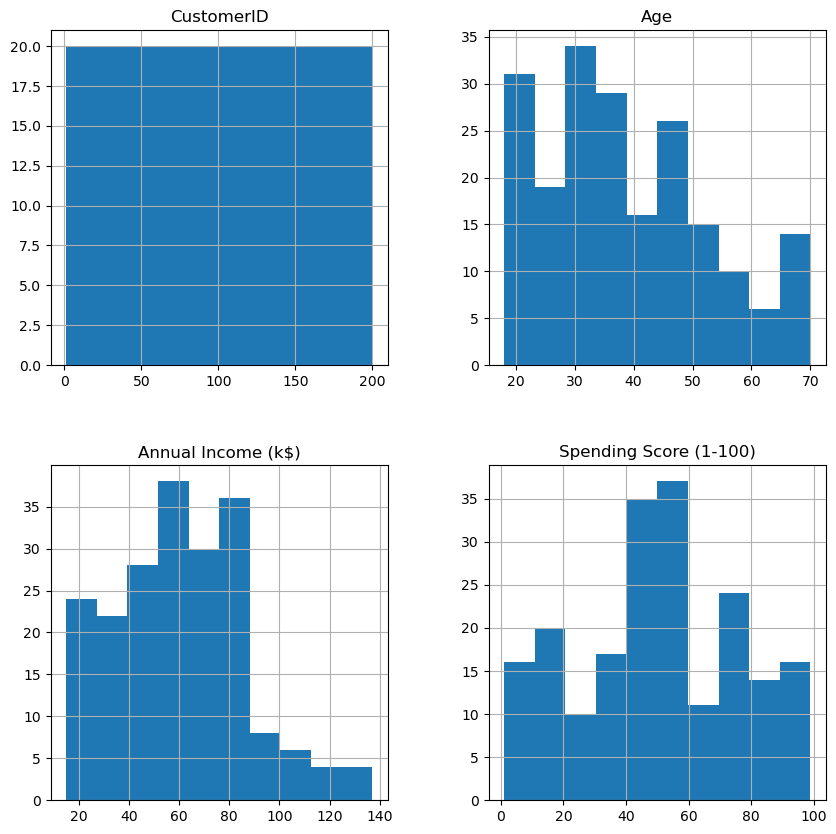

In [22]:
df.hist(figsize=(10,10));


In [23]:
# Select Features (Annual Income, Spending Score)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


w:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
w:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
w:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
w:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

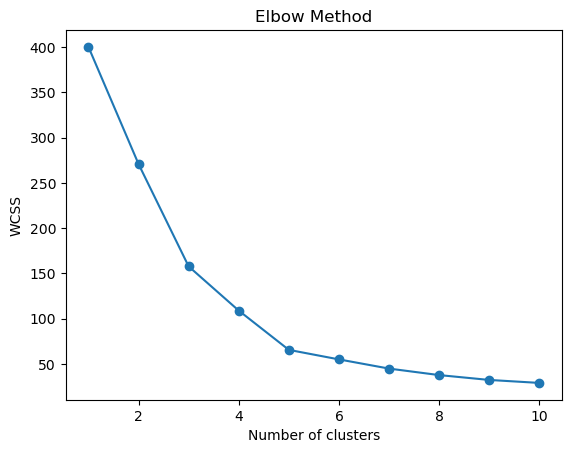

In [27]:

# -------------------------------
# K-Means Clustering
# -------------------------------

# Find optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


w:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


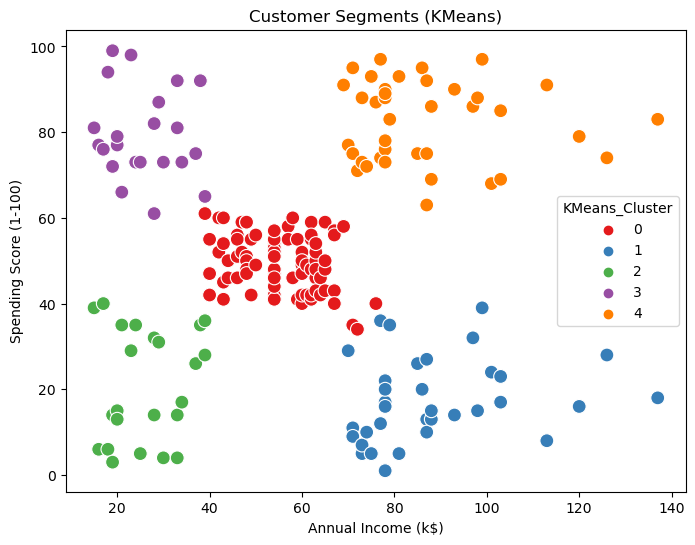

In [29]:

# Fit KMeans with chosen number of clusters (say 5)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['KMeans_Cluster'],
    palette='Set1',
    s=100
)
plt.title('Customer Segments (KMeans)')
plt.show()


In [30]:

# Evaluate clustering
print("KMeans Silhouette Score:", silhouette_score(X_scaled, df['KMeans_Cluster']))


KMeans Silhouette Score: 0.5546571631111091


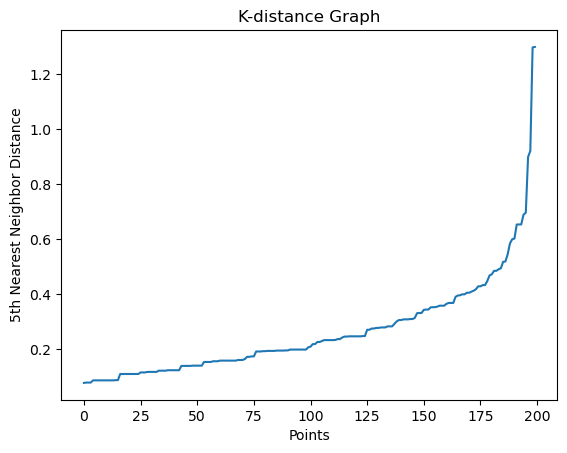

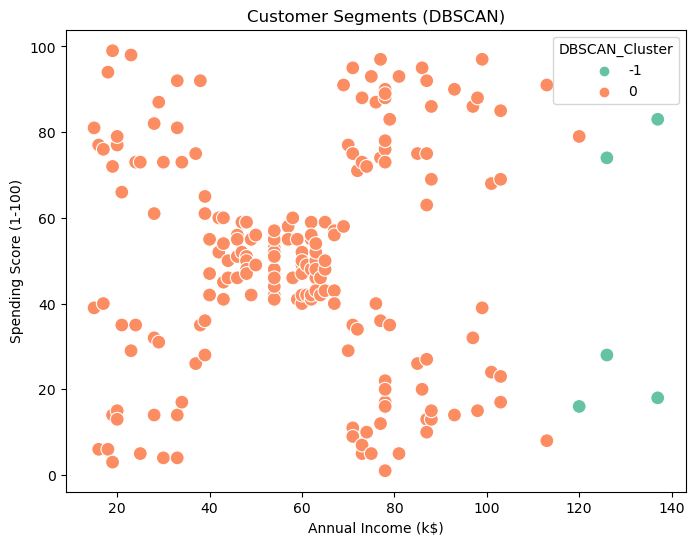

DBSCAN Cluster counts:
 DBSCAN_Cluster
 0    195
-1      5
Name: count, dtype: int64


In [ ]:

# Use k-distance graph to estimate good eps value
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort distances for knee/elbow method
distances = np.sort(distances[:, 4])  # 4 because n_neighbors=5
plt.plot(distances)
plt.title("K-distance Graph")
plt.xlabel("Points")
plt.ylabel("5th Nearest Neighbor Distance")
plt.show()

# Try DBSCAN with tuned parameters (example: eps=0.6, min_samples=5)
dbscan = DBSCAN(eps=0.6, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Visualize DBSCAN clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['DBSCAN_Cluster'],
    palette='Set2',
    s=100
)
plt.title('Customer Segments (DBSCAN)')
plt.show()

# Check how many clusters were found
print("DBSCAN Cluster counts:\n", df['DBSCAN_Cluster'].value_counts())


In [ ]:

# Analyze Spending per Cluster

cluster_spending = df.groupby('KMeans_Cluster')['Spending Score (1-100)'].mean()
print("\nAverage Spending Score per KMeans Cluster:")
print(cluster_spending)



Average Spending Score per KMeans Cluster:
KMeans_Cluster
0    49.518519
1    17.114286
2    20.913043
3    79.363636
4    82.128205
Name: Spending Score (1-100), dtype: float64
